In [31]:
#Libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import datetime
from scipy.signal import butter,filtfilt 

In [32]:
#Data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data=pd.read_csv(url)
#data=pd.read_csv(url,nrows = 200)
#data.head()

Minimum Daily Temperatures Dataset
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

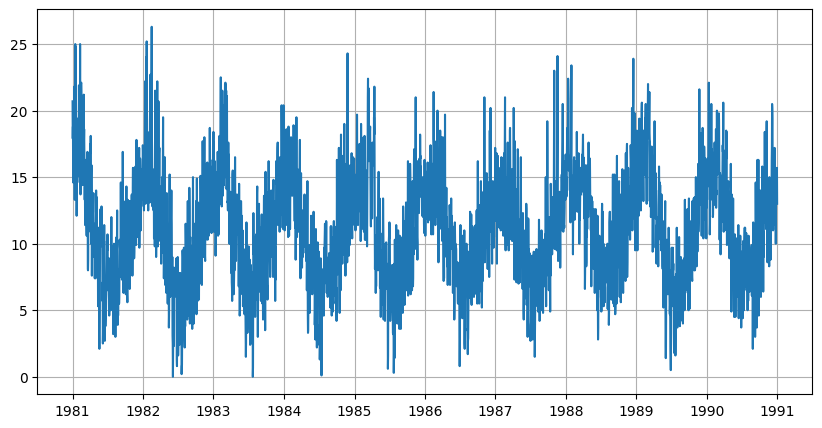

In [33]:
#Data corrections
dates = [0] * data.shape[0]
unix_epoch = [0] * data.shape[0]
for i in range(data.shape[0]):
    dates[i] = datetime.strptime(data['Date'][i],"%Y-%m-%d") # text string to Python datetime
    unix_epoch[i] = time.mktime(dates[i].timetuple())

data['Dates'] = dates
data['unix_epoch'] = unix_epoch

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(data['Dates'],data['Temp'])
plt.grid()
plt.show()

The slope of the trendline is 5.45794285491248e-10
The constant terms of the trendline is 10.902208193190088


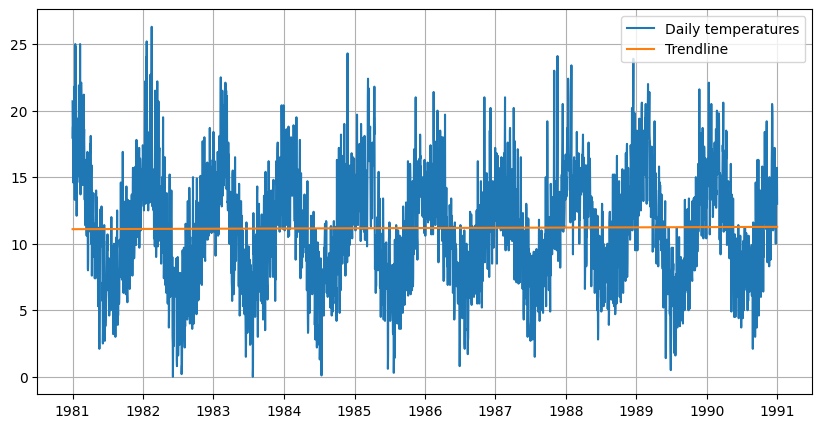

In [34]:
#Trendline

fit_coeff = np.polyfit(data['unix_epoch'],data['Temp'],1)
print('The slope of the trendline is', fit_coeff[0])
print('The constant terms of the trendline is', fit_coeff[1])

trendline = fit_coeff[0]*data['unix_epoch'] + fit_coeff[1]

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(data['Dates'],data['Temp'])
plt.plot(data['Dates'],trendline)
plt.legend(['Daily temperatures','Trendline'])
plt.grid()
plt.show()

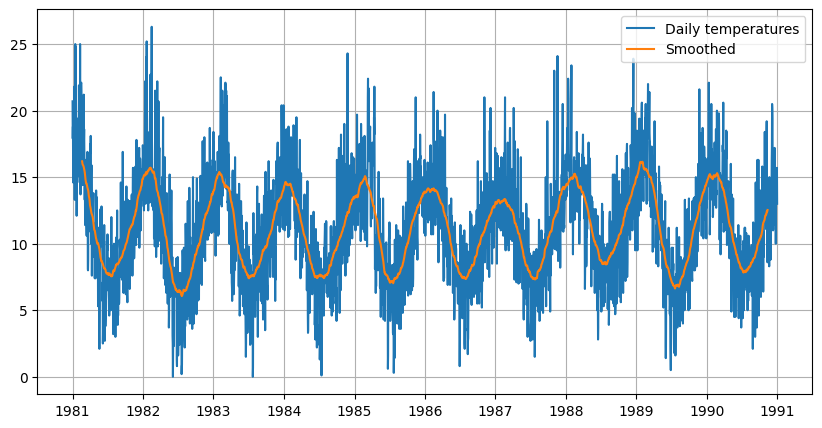

In [42]:
#Smoothing
w = 100 #Averaging period
temp_mean = data['Temp'].rolling(window = w).mean()
time_mean = pd.to_datetime(data['unix_epoch'].rolling(window = w).mean(), unit = 's')

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(data['Dates'],data['Temp']) #Original data
plt.plot(time_mean,temp_mean)
plt.legend(['Daily temperatures','Smoothed'])
plt.grid()
plt.show()


In [35]:
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [36]:
def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [58]:
# Filter requirements.     
T = data['unix_epoch'].max() - data['unix_epoch'].min() # Sample Period
n = len(data) #Number of samples
fs = n/T #sample rate, Hz
cutoff = 10*1/(365*24*60*60) # desired cutoff frequency of the filter, Hz 
cutoff2 = 2*1/(365*24*60*60) # desired cutoff frequency of the filter, Hz 
nyq = 0.5 * fs  # Nyquist Frequency
order = 1  # 

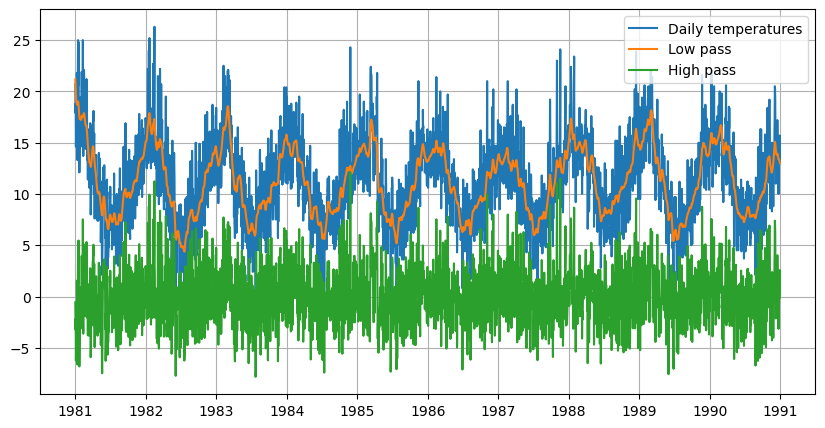

In [59]:
#Filtering

y = butter_lowpass_filter(data['Temp'], cutoff, fs, nyq, order) #Remove all the fluctuations in a time scale shorter than one year
y2= butter_highpass_filter(data['Temp'], cutoff2, fs, nyq, order) #Remove all the fluctuations in a time scale longer than one year

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(data['Dates'],data['Temp']) #Original data
plt.plot(data['Dates'], y)
plt.plot(data['Dates'], y2)
plt.legend(['Daily temperatures','Low pass','High pass'])
plt.grid()
plt.show()